# <center> Data Scientist Salary Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
dataset = pd.read_csv('data\\glassdoor_jobs.csv')
dataset.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


**Note :** `Unnamed: 0` column just contains indexes. So we will drop that column.

In [3]:
dataset = dataset.drop('Unnamed: 0', axis=1)

In [4]:
dataset.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          956 non-null    object 
 1   Salary Estimate    956 non-null    object 
 2   Job Description    956 non-null    object 
 3   Rating             956 non-null    float64
 4   Company Name       956 non-null    object 
 5   Location           956 non-null    object 
 6   Headquarters       956 non-null    object 
 7   Size               956 non-null    object 
 8   Founded            956 non-null    int64  
 9   Type of ownership  956 non-null    object 
 10  Industry           956 non-null    object 
 11  Sector             956 non-null    object 
 12  Revenue            956 non-null    object 
 13  Competitors        956 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 104.7+ KB


**Note :** As we can see NaN values are not in the dataset but they might be represented with some other values like -1 or 0.

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,956.0,3.601255,1.067619,-1.0,3.3,3.8,4.2,5.0
Founded,956.0,1774.605649,598.942517,-1.0,1937.0,1992.0,2008.0,2019.0


**Note :** NaN values are represented by -1 in the dataset.

# EDA steps

* 1. Missing values
* 2. Get Numeric features.
* 3. Check distribution of numeric features
* 6. Outliers
*    Fill missing numeric values
* 4. Get Categorical Features
* 5. analyaze categorical features
* outliers
* data cleaning
* 7. Relationship between indepedent and depedent variable.

In [7]:
data = dataset.copy()

**Numeric Features**

There are only two numeric features i.e. Rating and Founded


<Figure size 600x600 with 0 Axes>

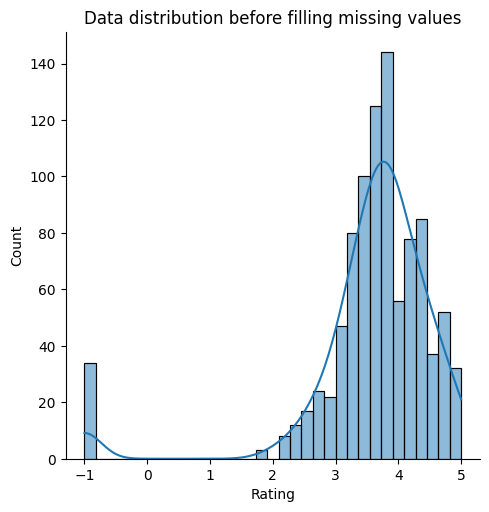

In [8]:
# visualization of Rating column

plt.figure(figsize=(6,6));
sns.displot(data= data, x= 'Rating',  kde=True);
plt.title('Data distribution before filling missing values');

**Note :** Rating feature follows `Normal distribution`. So we will replace missing values with `mean` of the column.

In [9]:
data['company_rating'] = data['Rating'].apply(lambda x: np.NaN if x==-1 else x)
data['company_rating'] = data['Rating'].fillna(data['Rating'].mean())

<Figure size 600x600 with 0 Axes>

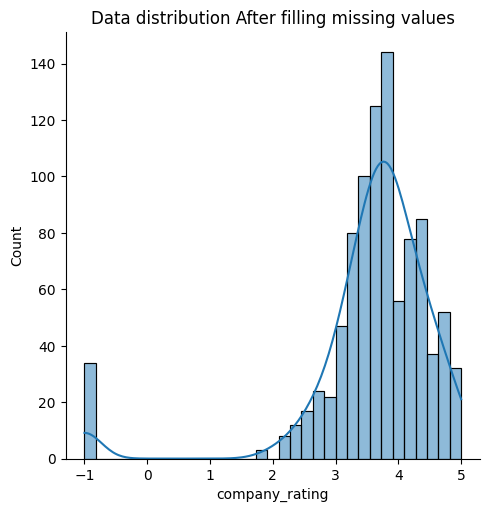

In [10]:
# visualization of Rating column

plt.figure(figsize=(6,6));
sns.displot(data= data, x= 'company_rating',  kde=True);
plt.title('Data distribution After filling missing values');

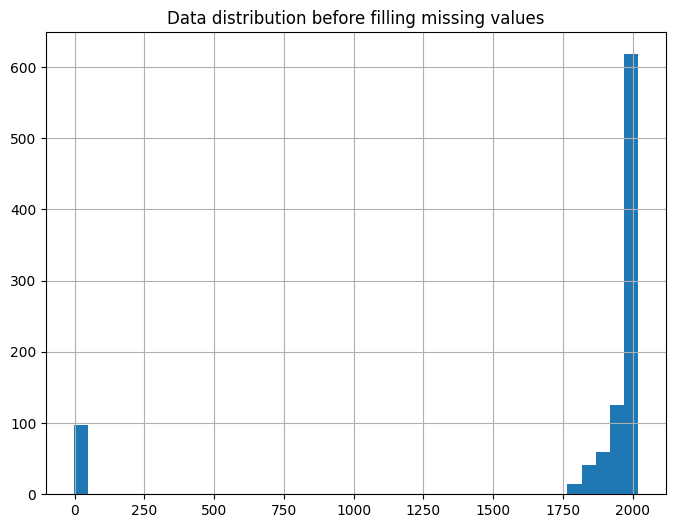

In [11]:
# visualization of Founded column 
plt.figure(figsize=(8,6));
data['Founded'].hist(bins= 40)
plt.title("Data distribution before filling missing values");

**Note :** Founded feature follows left skewed distribution. So we will replace missing values with `median` of that column.

In [12]:
data['company_founded'] = data['Founded'].apply(lambda x: np.NaN if x==-1 else x)
data['company_founded'] = data['Founded'].fillna(int(data['Founded'].median()))
data['company_founded'] = data['Founded'].astype('int')

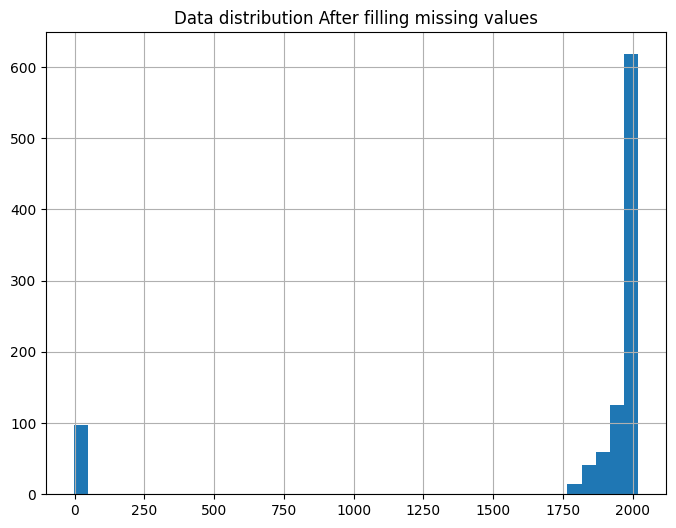

In [13]:
# visualization of Founded column 
plt.figure(figsize=(8,6));
data['company_founded'].hist(bins= 40)
plt.title("Data distribution After filling missing values");

## Feature Engineering
This dataset contains many features which needs to be cleaned.

In [14]:
data.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,company_rating,company_founded
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,3.8,1973
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,3.4,1984
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,4.8,2010


**Job Title**


In [15]:
data['Job Title'].value_counts().nlargest(20)

Data Scientist                                            178
Data Engineer                                              68
Senior Data Scientist                                      42
Data Analyst                                               18
Senior Data Engineer                                       17
Business Intelligence Analyst                              13
Senior Data Analyst                                        12
Lead Data Scientist                                         8
Data Science Manager                                        7
Principal Data Scientist                                    6
Machine Learning Engineer                                   6
Marketing Data Analyst                                      6
Sr. Data Engineer                                           6
Analytics Manager                                           5
Lead Data Engineer                                          5
Data Engineer 5 - Contract                                  4
Pharmaco

This column has many unique job titles. we have to trim this column into less number of job titles.

In [16]:
def job_title_trimmer(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower() or 'analyst' in title.lower():
        return 'data analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'machine learning engineer' in title.lower() or 'ml' in title.lower() or 'machine learning' in title.lower():
        return 'ml engineer'
    elif 'director' in title.lower():
        return 'director'
    else: 
        return 'other'

In [17]:
data['job_title'] = data['Job Title'].apply(job_title_trimmer)
data['job_title'].value_counts()

data scientist    560
data engineer     158
data analyst      122
other              53
manager            35
ml engineer        15
director           13
Name: job_title, dtype: int64

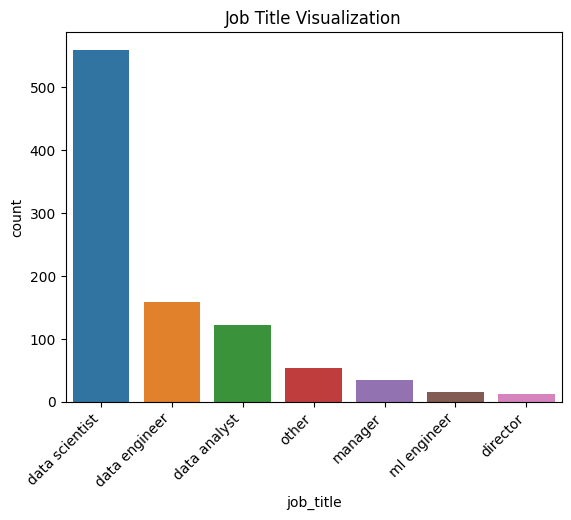

In [18]:
# Visualize job title column for better understanding
g = sns.countplot(x= 'job_title', data= data, order= data['job_title'].value_counts().index);
p = plt.title("Job Title Visualization")
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

Salary of Employee also depends significantly on his seniority. We will make new column `job_seniority` to address this aspect. 

In [19]:
def job_seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower():
        return 'sr'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'other'

In [20]:
data['job_seniority'] = data['Job Title'].apply(job_seniority)
data['job_seniority'].value_counts()

other    713
sr       240
jr         3
Name: job_seniority, dtype: int64

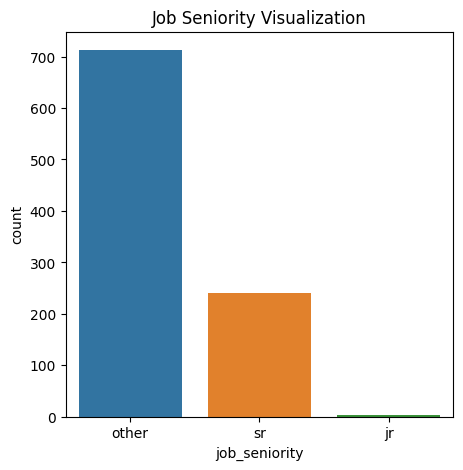

In [21]:
# Visualize job_seniority column

plt.figure(figsize=(5,5))
g = sns.countplot(x= 'job_seniority', data= data, order= data['job_seniority'].value_counts().index);
p = plt.title("Job Seniority Visualization")

In [22]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,company_rating,company_founded,job_title,job_seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,3.8,1973,data scientist,other
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,3.4,1984,data scientist,other
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,4.8,2010,data scientist,other
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",3.8,1965,data scientist,other
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",2.9,1998,data scientist,other


In [23]:
# drop Job Title colum
data = data.drop('Job Title', axis=1)

**Salary Estimate** <br>
This column contains many unnecessary things like (Glassdoor est.) , K (kilo) and $ (dollar).

In [24]:
# cleaning salary estimate column
salary = data['Salary Estimate'].apply(lambda x: x.split('(')[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954             -1
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [25]:
salary = salary.str.replace('[$K]', '', regex=True)
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954         -1
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [26]:
salary.value_counts()

-1                214
86-143              6
54-115              6
49-113              6
21-34 Per Hour      6
                 ... 
74-119              1
55-97               1
15-16               1
61-106              1
62-113              1
Name: Salary Estimate, Length: 417, dtype: int64

salary has many -1 values i.e. missing values. We will replace this values with NaN.

In [27]:
salary = salary.apply(lambda x: np.NaN if x=='-1' else x)
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [28]:
salary.unique()[150:200]

array(['98-182 ', '73-124 ', 'Employer Provided Salary:200-250',
       '21-34 Per Hour', '117-206 ', '111-183 ', '81-159 ', '83-166 ',
       '114-182 ', '42-76 ', '114-179 ', '60-123 ', '100-166 ',
       '108-173 ', '48-93 ', '54-115 ', '60-127 ', '90-179 ', '138-224 ',
       '190-220', '35-62 ', '18-25 Per Hour', '39-66 ', '42-86 ',
       '69-127 ', '40-68 ', '49-113 ', '75-140 ', '66-112 ', '76-125 ',
       '44-86 ', '15-25 Per Hour', '53-92 ', '65-120 ', '60-103 ',
       '53-105 ', '33-62 ', '48-90 ', '34-64 ', '66-111 ', '91-138 ',
       '62-114 ', '71-129 ', '74-119 ', '55-97 ', '15-16', '61-106 ',
       '127-199 ', '74-126 ', '33-72 '], dtype=object)

Some values have string as 'Employer Provided Salary'. We will remove that string first.

In [29]:
# Removing the string employer provided salary from salary array
salary = salary.apply(lambda x: x if type(x)==float else x.lower().replace("employer provided salary:", ""))
salary.unique()[:200]

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       nan, '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ',
       '93-149 ', '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ',
       '74-138 ', '64-112 ', '68-129 ', '52-113 ', '110-150', '150-160',
       '158-211 ', '20-39 ', '56-117 ', '63-99 ', '68-114 ', '41-95 ',
       '86-144 ', '80-139 ', '56-95 ', '120-189 ', '111-176 ', '84-146 ',
       '107-172 ', '49-85 ', '61-109 ', '88-148 ', '60-99 ', '41-72 ',
       '96-161 ', '65-130 ', '52-81 ', '139-220 ', '50-102 ', '85-139 ',
       '74-122 ', '99-157 ', '79-222 ', '57-118 ', '86-141 ', '94-154 ',
       '37-76 ', '100-160 ', '55-100 ', '60-114 ', '39-68 ', '64-107 ',
       '31-65 ', '34-62 ', '117-231 ', '79-134 ', '52-93 ', 

In salary column some salaries are given per hour, we have to convert them into per year salaries. <br>
Assuming :
>* 8 hours per day
>* 5 days per week
>* 52 weeks in a year.

In [30]:
# function to convert per hour salary ranges to per year
def salary_hourly_to_yearly(salary_range):
    if pd.isna(salary_range):
        return salary_range
    if 'per hour' in salary_range:
        num1, num2 = map(int, salary_range.split(' ')[0].split('-'))
        return f'{int(num1 * 8 * 5 * 52/1000)}-{int(num2 * 8 * 5 * 52/1000)}'
    return salary_range

In [31]:
new_salary = salary.apply(salary_hourly_to_yearly)
new_salary.unique()[150:200]

array(['98-182 ', '73-124 ', '200-250', '43-70', '117-206 ', '111-183 ',
       '81-159 ', '83-166 ', '114-182 ', '42-76 ', '114-179 ', '60-123 ',
       '100-166 ', '108-173 ', '48-93 ', '54-115 ', '60-127 ', '90-179 ',
       '138-224 ', '190-220', '35-62 ', '37-52', '39-66 ', '42-86 ',
       '69-127 ', '40-68 ', '49-113 ', '75-140 ', '66-112 ', '76-125 ',
       '44-86 ', '31-52', '53-92 ', '65-120 ', '60-103 ', '53-105 ',
       '33-62 ', '48-90 ', '34-64 ', '66-111 ', '91-138 ', '62-114 ',
       '71-129 ', '74-119 ', '55-97 ', '15-16', '61-106 ', '127-199 ',
       '74-126 ', '33-72 '], dtype=object)

We have converted per hour salaries into per year salaries But we still have some missing values. Now for further analysis, we will make salary column containing average of salary ranges that we have and see distribution of that column to fill missing values.

In [32]:
def calculate_average_salary(salary_range):
    if pd.isna(salary_range):
        return salary_range
    num1, num2 = map(int, salary_range.split(' ')[0].split('-'))
    return (int(num1 + num2) / 2)

In [33]:
averages = new_salary.apply(calculate_average_salary)

In [34]:
averages

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
951    102.5
952     73.5
953    127.5
954      NaN
955     93.5
Name: Salary Estimate, Length: 956, dtype: float64

In [35]:
# Make a salary column with averages

data['salary'] = averages

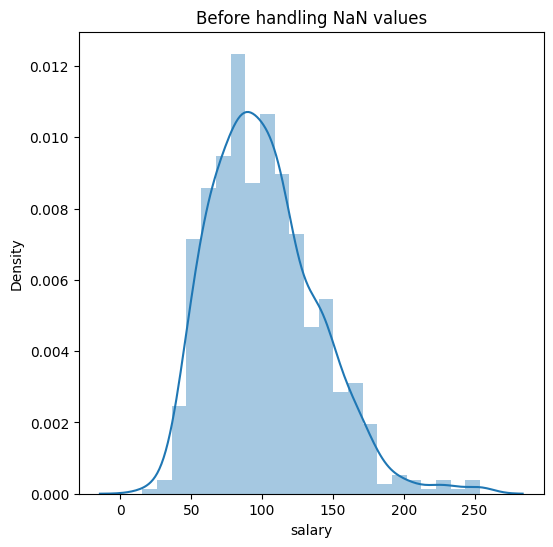

In [36]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=data['salary'])
p = plt.title('Before handling NaN values')

<Figure size 600x600 with 0 Axes>

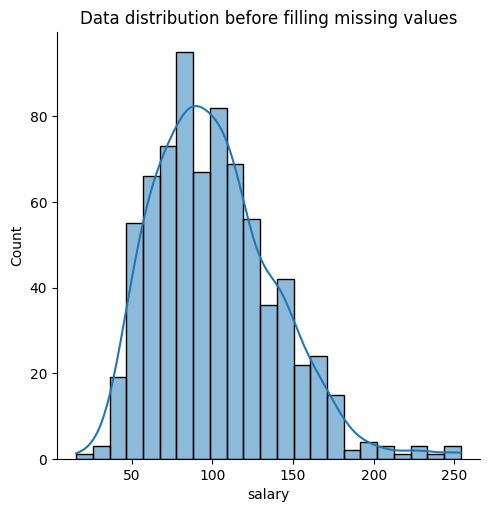

In [37]:
# visualization of Salary column

plt.figure(figsize=(6,6));
sns.displot(data= data, x= 'salary',  kde=True);
plt.title('Data distribution before filling missing values');

**Note :** Salary feature follows Normal distribution but it has some outliers. So we will replace missing values with `median` of that column.

In [38]:
# Handling NaN values in Salary column
data['salary'] = data['salary'].fillna(data['salary'].median())

<Figure size 600x600 with 0 Axes>

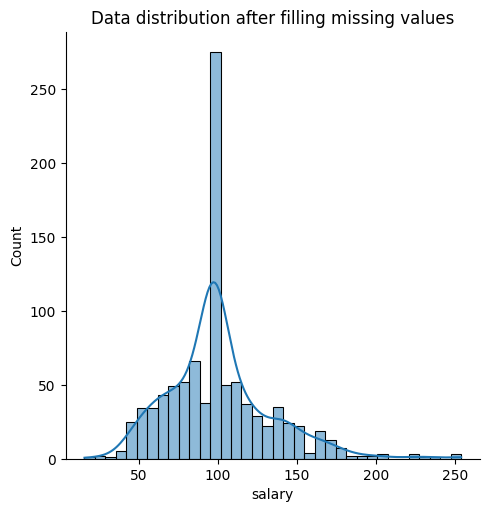

In [39]:
# visualization of Salary column

plt.figure(figsize=(6,6));
sns.displot(data= data, x= 'salary',  kde=True);
plt.title('Data distribution after filling missing values');

In [143]:
# drop Salary Estimate column
data = data.drop('Salary Estimate', axis=1)

In [144]:
data.head()

,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,company_rating,company_founded,job_title,job_seniority,salary
0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,3.8,1973,data scientist,other,72.0
1,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,3.4,1984,data scientist,other,87.5
2,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,4.8,2010,data scientist,other,85.0
3,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",3.8,1965,data scientist,other,76.5
4,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",2.9,1998,data scientist,other,114.5


**Job Description** <br>
This column contains information about job written in paragraphs which will be not that useful in training model. We have to extract some new columns from Job Description. e.g. based on skills mentioned in the column. So that we will get some useful information.

In [145]:
data['Job Description'][5]

'CyrusOne is seeking a talented Data Scientist who holds a range of data-focused skills both in technical and analytical domains. The ideal candidate is adept at processing, cleansing, and verifying the integrity of data used for visualization and analysis. This role is dynamic, granting the candidate the opportunity to participate in a wide variety of projects and collaborate with many cross-functional teams throughout the business.\n\nDuties and Responsibilities:\nParticipate in an agile scrum cadence\nProcess, cleanse, and verify the integrity of data used for analysis\nPerform functional business requirements analysis and data analysis\nDevelop data models and algorithms to apply to data sets\nAugment data collection procedures to include necessary information for building accurate analytics\nCollaborate with stakeholders throughout the organization to identify opportunities for leveraging data to drive business solutions\nEvaluate the effectiveness and accuracy of data sources and

In [146]:
# Creating columns of 'python, excel, sql, tableau, deep learning' jobs
data['python_job'] = data['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
data['excel_job'] = data['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
data['sql_job'] = data['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
data['tableau_job'] = data['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

In [147]:
data.head()

,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,company_rating,company_founded,job_title,job_seniority,salary,python_job,excel_job,sql_job,tableau_job
0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,3.8,1973,data scientist,other,72.0,1,1,0,1
1,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,3.4,1984,data scientist,other,87.5,1,0,0,0
2,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,4.8,2010,data scientist,other,85.0,1,1,1,0
3,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",3.8,1965,data scientist,other,76.5,1,0,0,0
4,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",2.9,1998,data scientist,other,114.5,1,1,1,0


[Text(0, 0.5, '')]

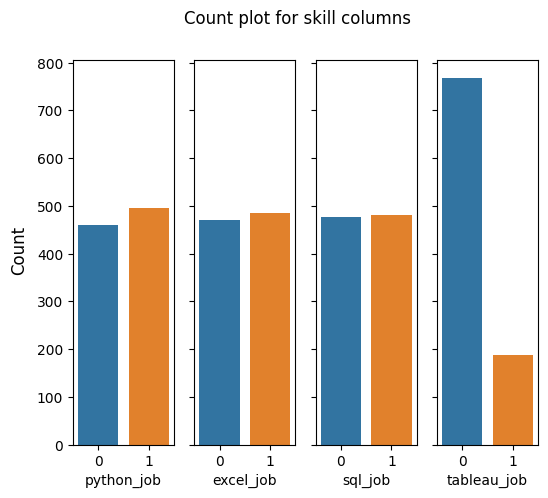

In [148]:
# visualize newly created skill columns from job description

fig, axes = plt.subplots(1,4, figsize=(6,5), sharey=True)
fig.suptitle('Count plot for skill columns')
fig.supylabel('Count')

# python_job
sns.countplot(ax=axes[0], x='python_job', data=data)
axes[0].set(ylabel=None)

# excel_job
sns.countplot(ax=axes[1], x='excel_job', data=data)
axes[1].set(ylabel=None)

# sql_job
sns.countplot(ax=axes[2], x='sql_job', data=data)
axes[2].set(ylabel=None)

# tableau_job
sns.countplot(ax=axes[3], x='tableau_job', data=data)
axes[3].set(ylabel=None)

In [149]:
# drop Job Description column
data =data.drop('Job Description', axis=1)

In [150]:
data.head(3)

,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,company_rating,company_founded,job_title,job_seniority,salary,python_job,excel_job,sql_job,tableau_job
0,3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,3.8,1973,data scientist,other,72.0,1,1,0,1
1,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,3.4,1984,data scientist,other,87.5,1,0,0,0
2,4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,4.8,2010,data scientist,other,85.0,1,1,1,0


**Company Name** <br>
I think target variable (salary) would not be affected by company name. So it will not be that useful in predictions.

In [151]:
# putting company names in one line 

data['Company Name']= data['Company Name'].apply(lambda x: x.split('\n')[0])

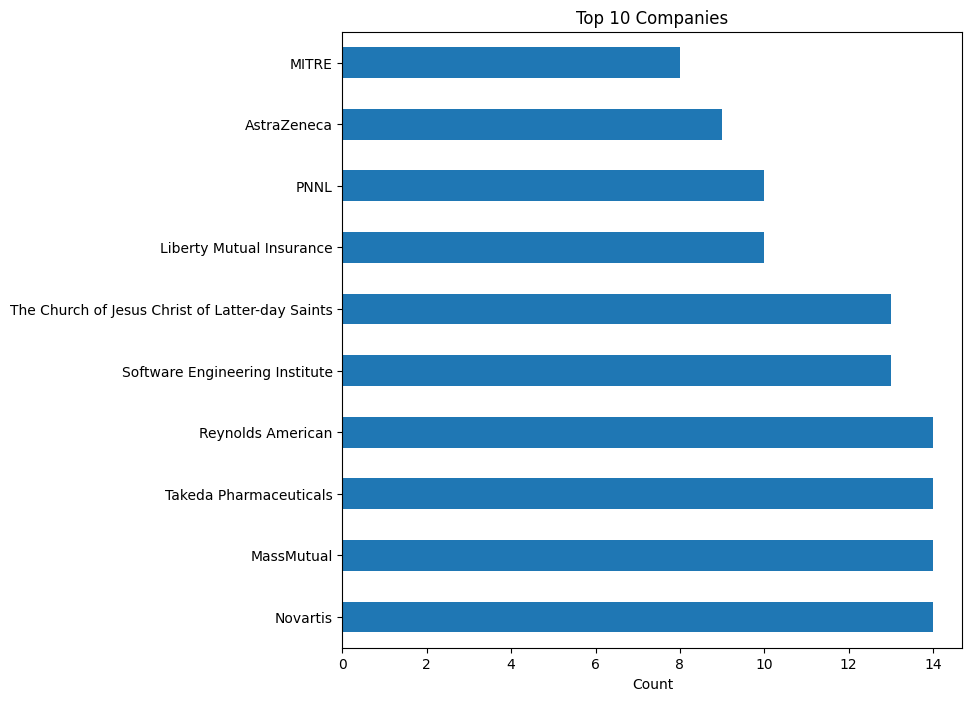

In [152]:
# visualizing Company Name column

plt.figure(figsize=(8,8))
g = data['Company Name'].value_counts().nlargest(10).plot(kind='barh')
p = plt.title('Top 10 Companies')
p = plt.xlabel('Count')

**Location**
This column have name of location as city, state.

In [153]:
data.Location.unique()

array(['Albuquerque, NM', 'Linthicum, MD', 'Clearwater, FL',
       'Richland, WA', 'New York, NY', 'Dallas, TX', 'Baltimore, MD',
       'San Jose, CA', 'Rochester, NY', 'Chantilly, VA', 'Plano, TX',
       'Seattle, WA', 'Cambridge, MA', 'Newark, NJ', 'Mountain View, CA',
       'San Francisco, CA', 'Denver, CO', 'Chicago, IL', 'Louisville, KY',
       'Oregon', 'Herndon, VA', 'Hillsboro, OR', 'Worcester, MA',
       'Groton, CT', 'Detroit, MI', 'Sunnyvale, CA', 'Ipswich, MA',
       'Redlands, CA', 'Woburn, MA', 'Fremont, CA', 'Long Beach, NY',
       'Marlborough, MA', 'Allendale, NJ', 'Chandler, AZ',
       'Washington, DC', 'Bellevue, WA', 'Longmont, CO',
       'Beavercreek, OH', 'Peoria, IL', 'Kingdom, IL',
       'Fort Lauderdale, FL', 'Boston, MA', 'Huntsville, AL',
       'Armonk, NY', 'San Diego, CA', 'Saint Louis, MO', 'Lincoln, RI',
       'Cincinnati, OH', 'Palo Alto, CA', 'Coraopolis, PA',
       'Framingham, MA', 'Atlanta, GA', 'New Jersey', 'Philadelphia, PA',
       

This column contains too many unique values of cities. So we will take only names of state from it for further analysis.

In [154]:
data['job_location'] = data['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())

In [156]:
data.head(3)

,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,company_rating,company_founded,job_title,job_seniority,salary,python_job,excel_job,sql_job,tableau_job,job_location
0,3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,3.8,1973,data scientist,other,72.0,1,1,0,1,NM
1,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,3.4,1984,data scientist,other,87.5,1,0,0,0,MD
2,4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,4.8,2010,data scientist,other,85.0,1,1,1,0,FL


In [157]:
len(data['job_location'].unique())

46

This column has 46 unique values.

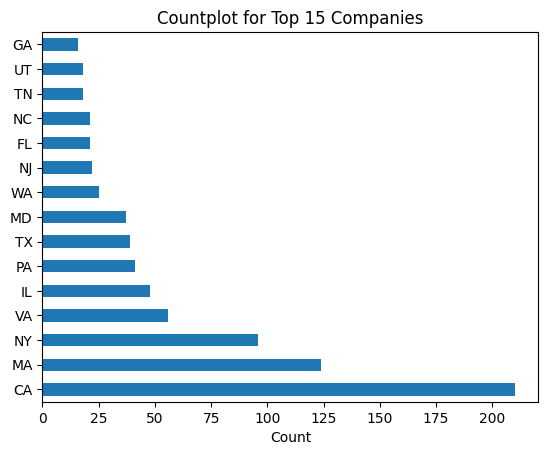

In [158]:
# visualize countplot of job_location.
data['job_location'].value_counts().nlargest(15).plot(kind='barh');
plt.title('Countplot for Top 15 Companies');
plt.xlabel('Count');

We will take first 10 companies in value count and put remaining company names in `others`.

In [159]:
# trimming job_location column

top_10_locations = list(data['job_location'].value_counts()[:10].index)

In [160]:
# create function to trim job_location column

def job_location_trimmer(text):
    if text not in top_10_locations:
        return 'Others'
    else:
        return text

In [161]:
data['job_location'] = data['job_location'].apply(job_location_trimmer)

In [162]:
data.head(3)

,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,company_rating,company_founded,job_title,job_seniority,salary,python_job,excel_job,sql_job,tableau_job,job_location
0,3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,3.8,1973,data scientist,other,72.0,1,1,0,1,Others
1,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,3.4,1984,data scientist,other,87.5,1,0,0,0,MD
2,4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,4.8,2010,data scientist,other,85.0,1,1,1,0,Others


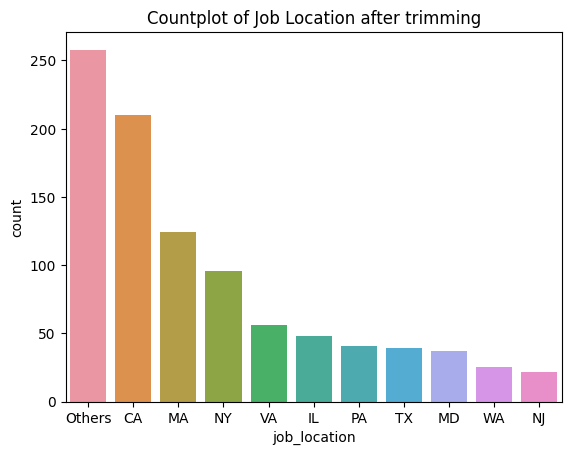

In [163]:
# visualize countplot of job_location.

sns.countplot(x='job_location', data= data, order=data['job_location'].value_counts().index);
plt.title('Countplot of Job Location after trimming');

**Headquarters** <br>
We will make a new column named job_in_headquarter because having job at headquarter office might affect salary.

In [164]:
bools = data['Location'] == data['Headquarters']
data['job_in_headquarter'] = pd.Series([1 if value== True else 0 for value in bools])

In [165]:
data.head(3)

,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,company_rating,company_founded,job_title,job_seniority,salary,python_job,excel_job,sql_job,tableau_job,job_location,job_in_headquarter
0,3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,3.8,1973,data scientist,other,72.0,1,1,0,1,Others,0
1,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,3.4,1984,data scientist,other,87.5,1,0,0,0,MD,0
2,4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,4.8,2010,data scientist,other,85.0,1,1,1,0,Others,1


**Size** <br>
fill -1 values of size with `Unknown`


In [166]:
data['company_size'] = data['Size'].apply(lambda x: 'Unknown' if x=='-1' else x)

In [167]:
data.company_size.value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     26
Name: company_size, dtype: int64

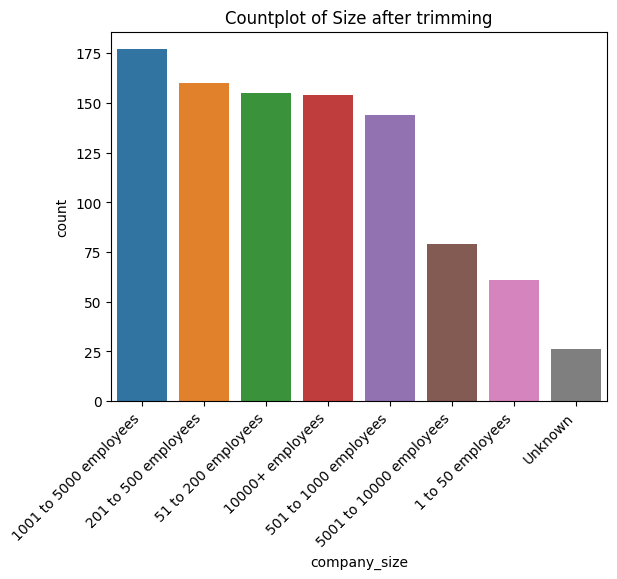

In [168]:
# visualize countplot of Size column.

g = sns.countplot(x='company_size', data= data, order=data['company_size'].value_counts().index);
p =plt.title('Countplot of Size after trimming');
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

**Type of Ownership** <br>
trim some unique values into `other`

In [169]:
data.head(3)

,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,company_rating,company_founded,job_title,job_seniority,salary,python_job,excel_job,sql_job,tableau_job,job_location,job_in_headquarter,company_size
0,3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,3.8,1973,data scientist,other,72.0,1,1,0,1,Others,0,501 to 1000 employees
1,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,3.4,1984,data scientist,other,87.5,1,0,0,0,MD,0,10000+ employees
2,4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,4.8,2010,data scientist,other,85.0,1,1,1,0,Others,1,501 to 1000 employees


In [170]:
data['Type of ownership'].value_counts()

Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: Type of ownership, dtype: int64

In [171]:
def ownership_trimmer(text):
    if 'private' in text.lower():
        return 'Private'
    elif 'public' in text.lower():
        return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()) or ('contract' in text.lower()) or ('school / school district' in text.lower()):
        return 'Other Organization'
    else:
        return text

In [172]:
data['type_of_ownership'] = data['Type of ownership'].apply(ownership_trimmer)

In [173]:
data['type_of_ownership'].value_counts()

Private                           533
Public                            237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Other Organization                 34
Government                         17
Hospital                           15
College / University               15
Name: type_of_ownership, dtype: int64

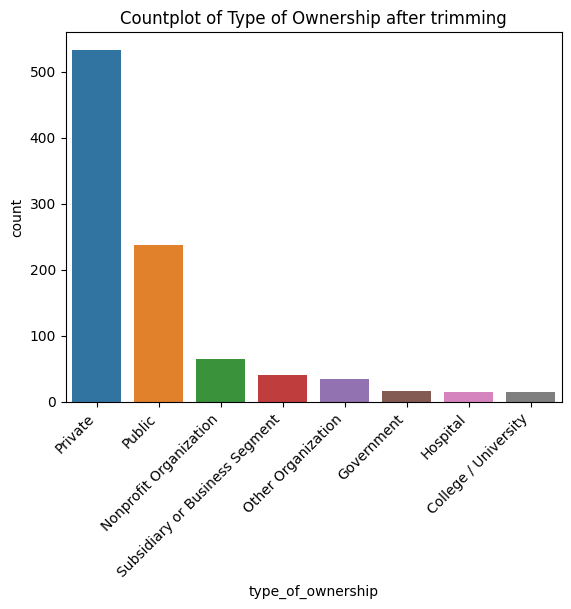

In [174]:
# visualize countplot of Type of Ownership column.

g = sns.countplot(x='type_of_ownership', data= data, order=data['type_of_ownership'].value_counts().index);
p =plt.title('Countplot of Type of Ownership after trimming');
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

**Industry** <br>
  fill -1 values with `other`

In [175]:
data.head(3)

,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,company_rating,company_founded,job_title,job_seniority,salary,python_job,excel_job,sql_job,tableau_job,job_location,job_in_headquarter,company_size,type_of_ownership
0,3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,3.8,1973,data scientist,other,72.0,1,1,0,1,Others,0,501 to 1000 employees,Private
1,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,3.4,1984,data scientist,other,87.5,1,0,0,0,MD,0,10000+ employees,Other Organization
2,4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,4.8,2010,data scientist,other,85.0,1,1,1,0,Others,1,501 to 1000 employees,Private


In [176]:
# fill -1 values in industry with others

data['industry'] = data['Industry'].apply(lambda x: 'others' if x== '-1' else x)

In [177]:
data['industry'].value_counts()[:20]

Biotech & Pharmaceuticals                  148
IT Services                                 77
Computer Hardware & Software                70
Insurance Carriers                          65
Enterprise Software & Network Solutions     56
Health Care Services & Hospitals            51
Staffing & Outsourcing                      39
others                                      39
Internet                                    36
Consulting                                  34
Aerospace & Defense                         32
Advertising & Marketing                     25
Consumer Products Manufacturing             23
Research & Development                      21
Banks & Credit Unions                       19
Colleges & Universities                     18
Lending                                     14
Energy                                      14
Religious Organizations                     13
Federal Agencies                            13
Name: industry, dtype: int64

In [178]:
data['industry'].nunique()

63

In [179]:
# list for top 20 industry
industry_list = list(data.industry.value_counts()[:20].index)

In [180]:
# function to trim -1 values and other than top 20 sectors into Others
def industry_trimmer(text):
    if '-1' in text or text not in industry_list:
        return 'Others'
    else:
        return text

In [181]:
data['industry'] = data.industry.apply(industry_trimmer)

In [182]:
data['industry'].value_counts()

Others                                     149
Biotech & Pharmaceuticals                  148
IT Services                                 77
Computer Hardware & Software                70
Insurance Carriers                          65
Enterprise Software & Network Solutions     56
Health Care Services & Hospitals            51
Staffing & Outsourcing                      39
others                                      39
Internet                                    36
Consulting                                  34
Aerospace & Defense                         32
Advertising & Marketing                     25
Consumer Products Manufacturing             23
Research & Development                      21
Banks & Credit Unions                       19
Colleges & Universities                     18
Energy                                      14
Lending                                     14
Federal Agencies                            13
Religious Organizations                     13
Name: industr

**sector** <br>
  fill -1 values with `other`
  We will take first 10 sectors in value count and put remaining sectors in `others`.

In [183]:
data.Sector.value_counts()

Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Agriculture & Forestry            

In [184]:
# list for top 10 sectors
sector_list = list(data.Sector.value_counts()[:10].index)

In [185]:
# function to trim -1 values and other than top 10 sectors into Others
def sector_trimmer(text):
    if '-1' in text or text not in sector_list:
        return 'Others'
    else:
        return text

In [186]:
data['sector'] = data.Sector.apply(sector_trimmer)

In [187]:
data['sector'].value_counts()

Information Technology       239
Others                       159
Biotech & Pharmaceuticals    148
Business Services            134
Insurance                     71
Finance                       56
Health Care                   51
Manufacturing                 40
Aerospace & Defense           32
Education                     26
Name: sector, dtype: int64

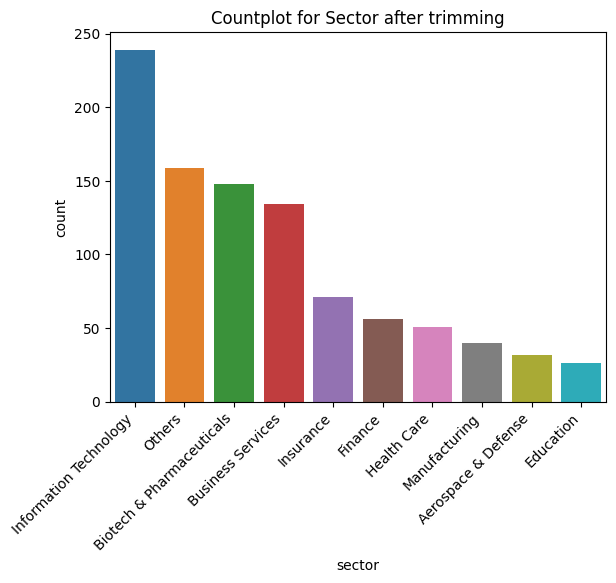

In [188]:
# visualize Sector column after trimming

g = sns.countplot(x='sector', data= data, order= data['sector'].value_counts().index)
p = plt.title('Countplot for Sector after trimming')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment= 'right');

**Revenue** <br>
  fill -1 values with `unknown/NA`
 

In [189]:
data.head(3)

,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,company_rating,company_founded,job_title,job_seniority,salary,python_job,excel_job,sql_job,tableau_job,job_location,job_in_headquarter,company_size,type_of_ownership,industry,sector
0,3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,3.8,1973,data scientist,other,72.0,1,1,0,1,Others,0,501 to 1000 employees,Private,Aerospace & Defense,Aerospace & Defense
1,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,3.4,1984,data scientist,other,87.5,1,0,0,0,MD,0,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care
2,4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,4.8,2010,data scientist,other,85.0,1,1,1,0,Others,1,501 to 1000 employees,Private,Others,Business Services


In [190]:
data.Revenue.value_counts()

Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

In [191]:
def revenue_trimmer(text):
    if '-1' in text.lower():
        return "Unknown / Non-Applicable"
    else:
        return text

In [192]:
data["revenue"] = data.Revenue.apply(revenue_trimmer)

In [193]:
data.revenue.value_counts()

Unknown / Non-Applicable            310
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
Less than $1 million (USD)            9
Name: revenue, dtype: int64

**Competitors** <br>
fill -1 values with 0 and replace strings with count of competitors.

In [194]:
data.head(3)

,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,company_rating,company_founded,job_title,job_seniority,salary,python_job,excel_job,sql_job,tableau_job,job_location,job_in_headquarter,company_size,type_of_ownership,industry,sector,revenue
0,3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,3.8,1973,data scientist,other,72.0,1,1,0,1,Others,0,501 to 1000 employees,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD)
1,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,3.4,1984,data scientist,other,87.5,1,0,0,0,MD,0,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,4.8,2010,data scientist,other,85.0,1,1,1,0,Others,1,501 to 1000 employees,Private,Others,Business Services,$100 to $500 million (USD)


In [195]:
data.Competitors.value_counts()

-1                                                                                              634
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
                                                                                               ... 
Slalom, Cognizant Technology Solutions, Deloitte                                                  1
Greystar, The Related Companies, Prometheus Real Estate Group                                     1
Ecolab, Eurofin Private Investment Office                                                         1
USAA, Navy Federal Credit Union, Raymond James Financial                                          1


In [196]:
len(data.Competitors.value_counts().index[2].split(','))

3

In [197]:
data['competitors'] = data.Competitors.apply(lambda x: 0 if x== '-1' else len(x.split(',')))

In [198]:
data.competitors.value_counts()

0    634
3    253
2     50
1     18
4      1
Name: competitors, dtype: int64

In [199]:
data.head(3)

,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,company_rating,company_founded,job_title,job_seniority,salary,python_job,excel_job,sql_job,tableau_job,job_location,job_in_headquarter,company_size,type_of_ownership,industry,sector,revenue,competitors
0,3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,3.8,1973,data scientist,other,72.0,1,1,0,1,Others,0,501 to 1000 employees,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0
1,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,3.4,1984,data scientist,other,87.5,1,0,0,0,MD,0,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0
2,4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,4.8,2010,data scientist,other,85.0,1,1,1,0,Others,1,501 to 1000 employees,Private,Others,Business Services,$100 to $500 million (USD),0


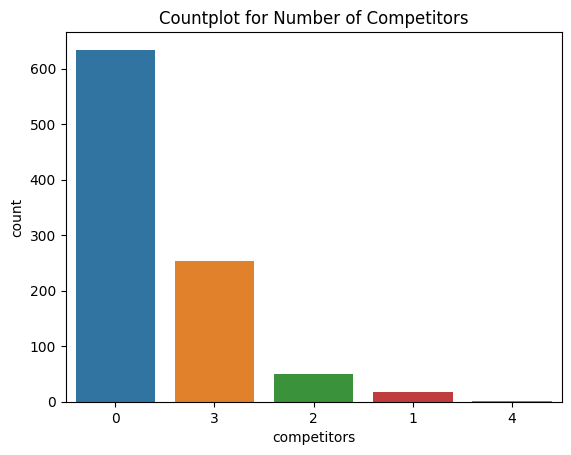

In [200]:
# Visualize Competitors column

g = sns.countplot(x= 'competitors', data=data, order= data['competitors'].value_counts().index)
p = plt.title("Countplot for Number of Competitors");

### Drop unnecessary columns

In [201]:
data.tail()

,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,company_rating,company_founded,job_title,job_seniority,salary,python_job,excel_job,sql_job,tableau_job,job_location,job_in_headquarter,company_size,type_of_ownership,industry,sector,revenue,competitors
951,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",4.4,2006,data engineer,sr,102.5,1,0,1,0,Others,0,1001 to 5000 employees,Public,Internet,Information Technology,$100 to $500 million (USD),3
952,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,2.6,1984,data scientist,other,73.5,0,1,0,0,PA,1,501 to 1000 employees,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0
953,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,3.2,-1,manager,other,127.5,0,1,0,0,PA,0,1 to 50 employees,Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),0
954,4.8,IGNW,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom,4.8,2015,data engineer,other,97.5,1,0,1,0,TX,0,201 to 500 employees,Private,IT Services,Information Technology,$25 to $50 million (USD),1
955,3.6,Riverside Research Institute,"Beavercreek, OH","Arlington, VA",501 to 1000 employees,1967,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),-1,3.6,1967,data scientist,other,93.5,1,0,0,0,Others,0,501 to 1000 employees,Nonprofit Organization,Federal Agencies,Others,$50 to $100 million (USD),0


In [202]:
# We have extracted information from existing features by creating new features. Now we will drop those old features because 
# we don't need them anymore.

data = data.drop(['Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'industry', 'Sector', 'Revenue', 'Competitors', 'job_location'], axis=1)

In [203]:
data.head(3)

,company_rating,company_founded,job_title,job_seniority,salary,python_job,excel_job,sql_job,tableau_job,job_in_headquarter,company_size,type_of_ownership,sector,revenue,competitors
0,3.8,1973,data scientist,other,72.0,1,1,0,1,0,501 to 1000 employees,Private,Aerospace & Defense,$50 to $100 million (USD),0
1,3.4,1984,data scientist,other,87.5,1,0,0,0,0,10000+ employees,Other Organization,Health Care,$2 to $5 billion (USD),0
2,4.8,2010,data scientist,other,85.0,1,1,1,0,1,501 to 1000 employees,Private,Business Services,$100 to $500 million (USD),0


### convert categorical features into numerical by suitable encoding
We have two types of categorical features in this dataset i.e. Nominal features and Ordinal features.
* In case of ordinal features, we will use LabelEncodig.
* In case of nominal features, we will use OneHotEncoding.


**Ordinal Features**
* job_seniority
* company size
* revenue

In [204]:
# job_seniority

seniority_map = {'other':0, 'jr': 1, 'sr': 2}

data['job_seniority'] = data['job_seniority'].map(seniority_map)

In [205]:
# company size

# Mapping ranks to 'company_size' column
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

data['company_size'] = data['company_size'].map(size_map)

In [206]:
# revenue

revenue_map = {'Unknown / Non-Applicable': 0,
           'Less than $1 million (USD)': 1,
           '$1 to $5 million (USD)': 2,
           '$5 to $10 million (USD)': 3,
           '$10 to $25 million (USD)': 4, 
           '$25 to $50 million (USD)': 5,
           '$50 to $100 million (USD)': 6, 
           '$100 to $500 million (USD)': 7,     
           '$500 million to $1 billion (USD)': 8,
           '$1 to $2 billion (USD)': 9,
           '$2 to $5 billion (USD)': 10,
           '$5 to $10 billion (USD)':11,
           '$10+ billion (USD)':12}

data['revenue'] = data['revenue'].map(revenue_map)

In [207]:
data.head(3)

,company_rating,company_founded,job_title,job_seniority,salary,python_job,excel_job,sql_job,tableau_job,job_in_headquarter,company_size,type_of_ownership,sector,revenue,competitors
0,3.8,1973,data scientist,0,72.0,1,1,0,1,0,4,Private,Aerospace & Defense,6,0
1,3.4,1984,data scientist,0,87.5,1,0,0,0,0,7,Other Organization,Health Care,10,0
2,4.8,2010,data scientist,0,85.0,1,1,1,0,1,4,Private,Business Services,7,0


**Nominal Features**
* job title
* type of ownership
* sector

In [208]:
dataset = data.copy()

In [209]:
# doing onehotencoding for all the above columns

dataset = pd.get_dummies(data=dataset, columns=['job_title', 'type_of_ownership','sector'])

In [210]:
# drop column to avoid dummy variable trap

dataset.drop(labels=['type_of_ownership_Other Organization', 'sector_Others', 'job_title_other'], axis=1, inplace=True)


In [211]:
dataset.head(3)

,company_rating,company_founded,job_seniority,salary,python_job,excel_job,sql_job,tableau_job,job_in_headquarter,company_size,revenue,competitors,job_title_data analyst,job_title_data engineer,job_title_data scientist,job_title_director,job_title_manager,job_title_ml engineer,type_of_ownership_College / University,type_of_ownership_Government,type_of_ownership_Hospital,type_of_ownership_Nonprofit Organization,type_of_ownership_Private,type_of_ownership_Public,type_of_ownership_Subsidiary or Business Segment,sector_Aerospace & Defense,sector_Biotech & Pharmaceuticals,sector_Business Services,sector_Education,sector_Finance,sector_Health Care,sector_Information Technology,sector_Insurance,sector_Manufacturing
0,3.8,1973,0,72.0,1,1,0,1,0,4,6,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,3.4,1984,0,87.5,1,0,0,0,0,7,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,4.8,2010,0,85.0,1,1,1,0,1,4,7,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [212]:
dataset.shape

(956, 34)

### Feature Selection
Now this dataset contains many number of features so we have to select some important features which will help in our predictions. for that we will see correlation between all the features.

In [213]:
# we have too many columns in dataset. so we will see correlation matrix only for top 20 highly correlated features.
Correlation = dataset.corr()
top_30 = Correlation.salary.sort_values(ascending=False)[:20].index

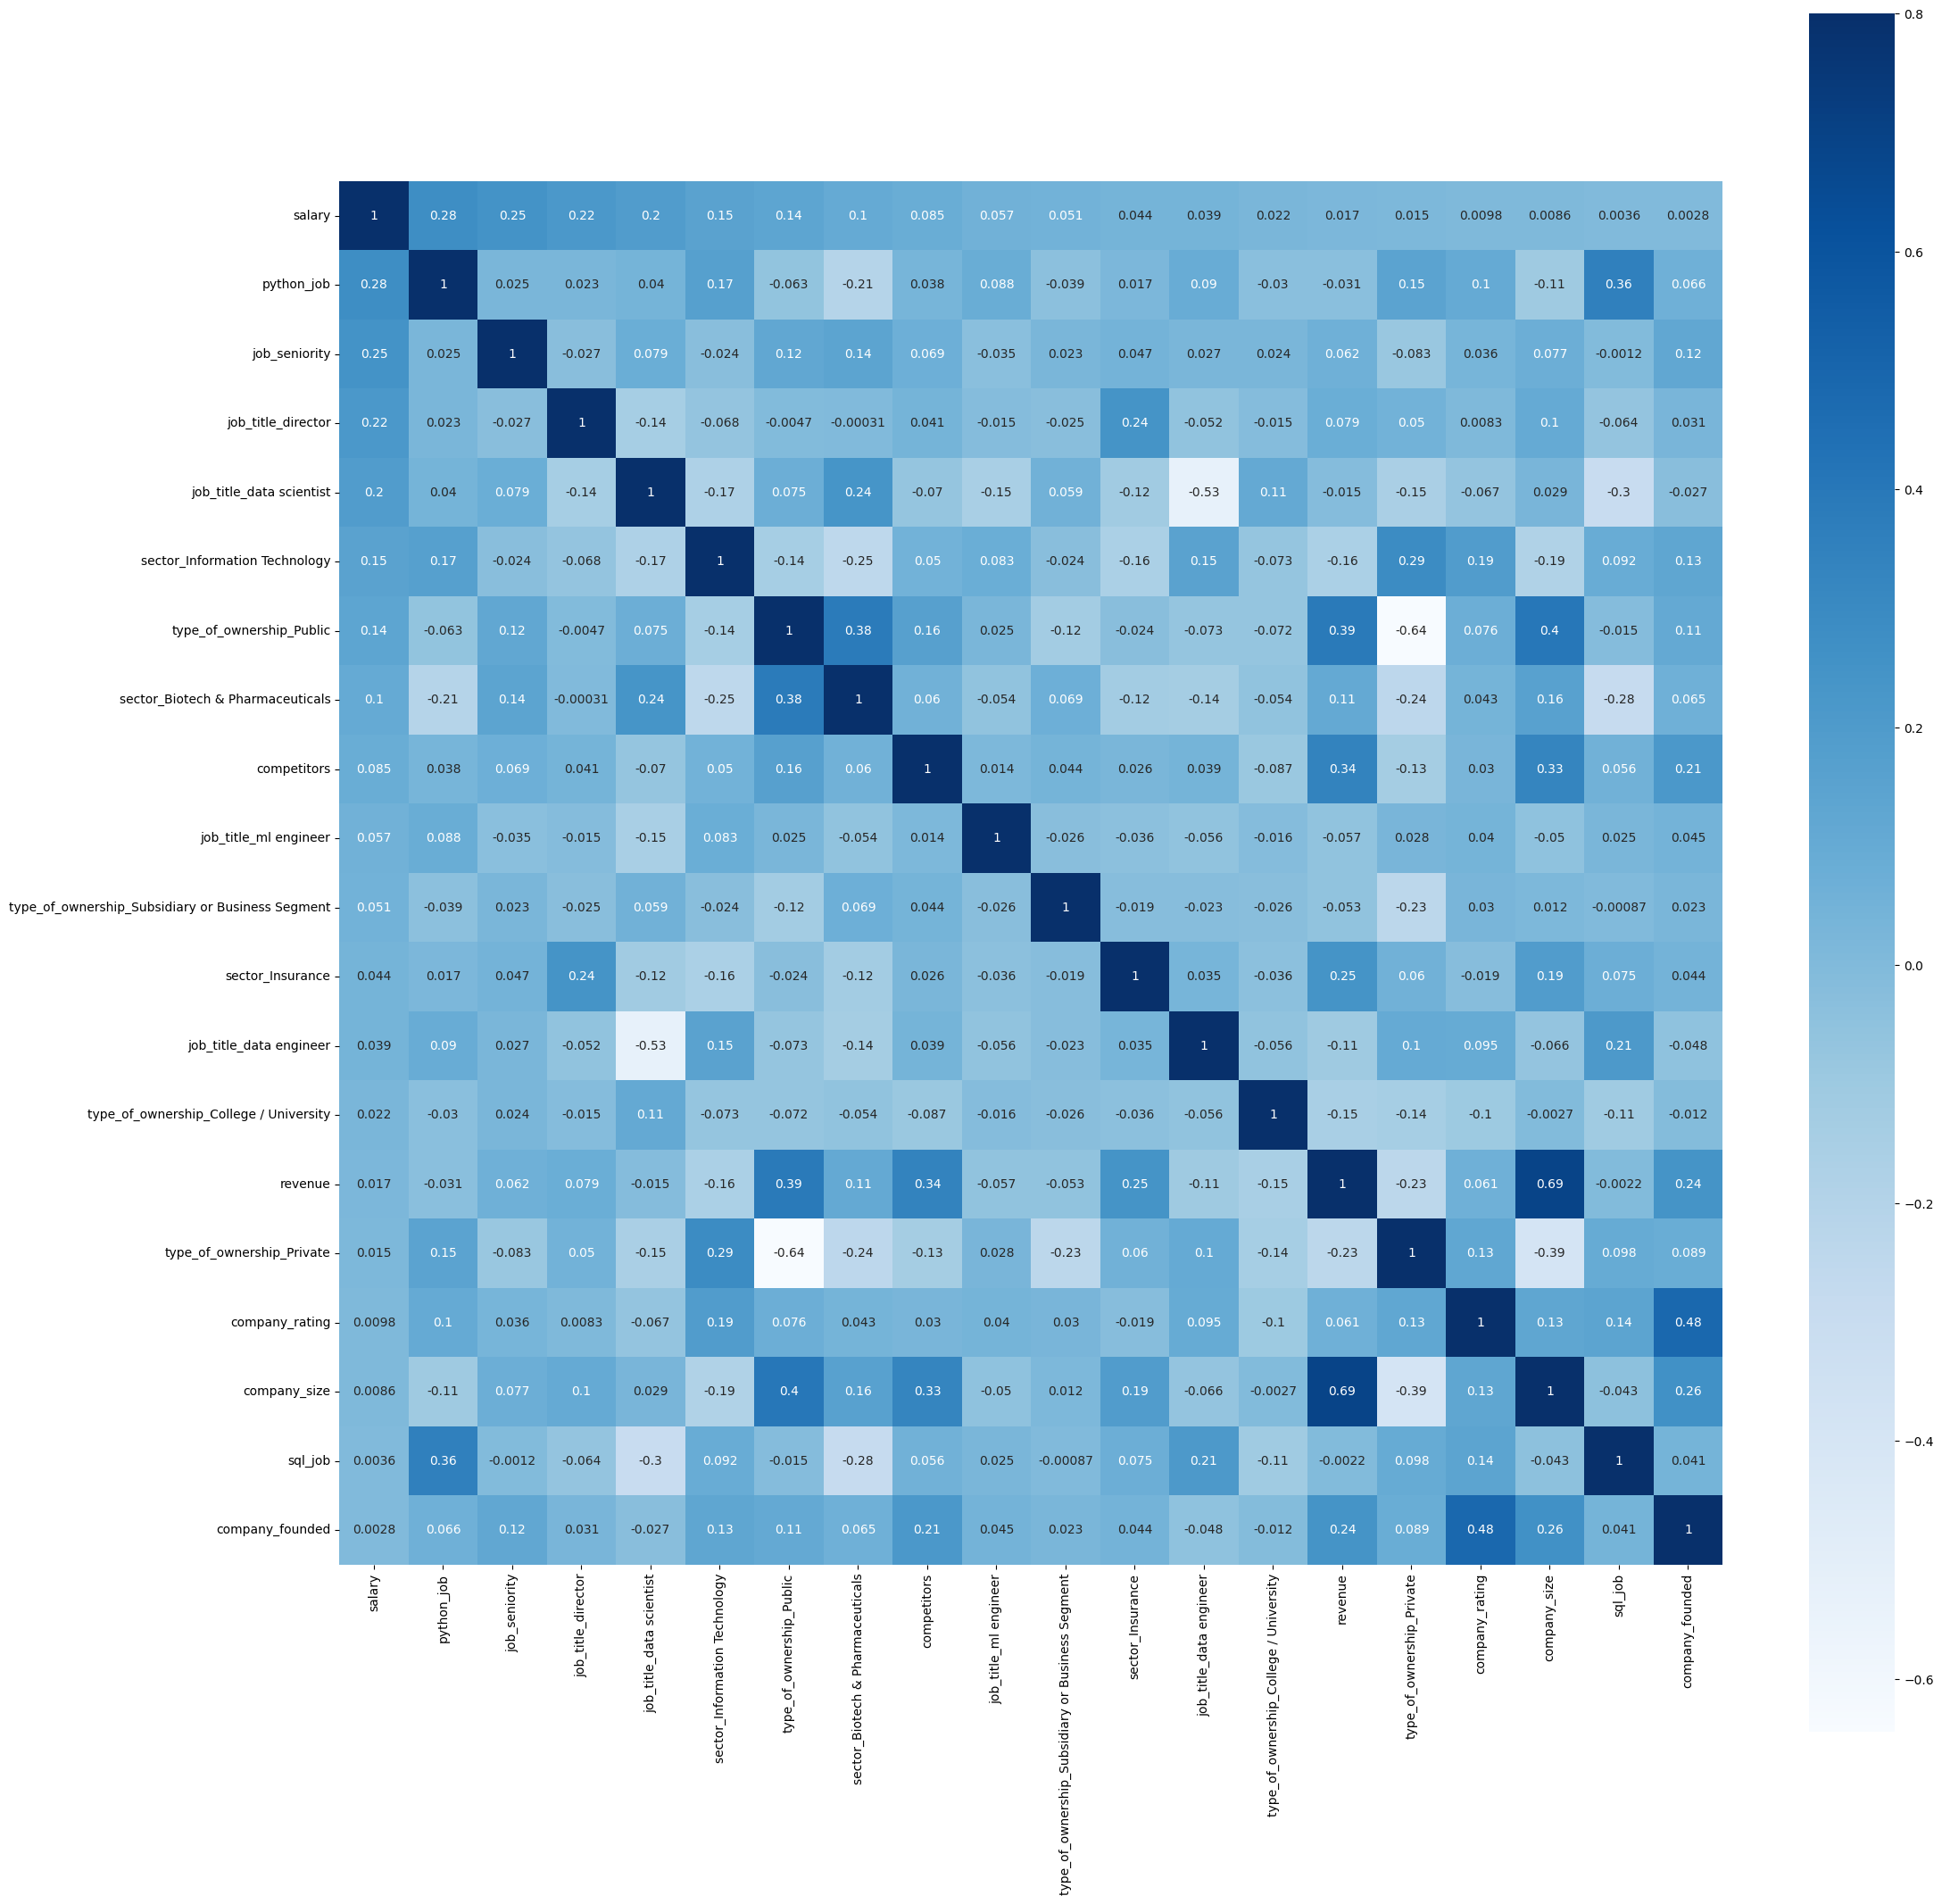

In [214]:
correlation_matrix = dataset[top_30].corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, vmax=.8,annot=True, cmap="Blues", square=True,);

From above correlation matrix, we found that following columns are moderately correlated.
* job_title_data_engineer and job_title_data_scientist
* type_of_ownership_public and type_of_ownership_private
* company_size and revenue
* sector education and type_of_ownership_College / University

We will drop one of the columns from above pairs.

In [215]:
dataset.drop(labels=['job_title_data engineer', 'type_of_ownership_Public', 'company_size', 'sector_Education'], axis=1, inplace=True)

In [216]:
dataset[150:200]

,company_rating,company_founded,job_seniority,salary,python_job,excel_job,sql_job,tableau_job,job_in_headquarter,revenue,competitors,job_title_data analyst,job_title_data scientist,job_title_director,job_title_manager,job_title_ml engineer,type_of_ownership_College / University,type_of_ownership_Government,type_of_ownership_Hospital,type_of_ownership_Nonprofit Organization,type_of_ownership_Private,type_of_ownership_Subsidiary or Business Segment,sector_Aerospace & Defense,sector_Biotech & Pharmaceuticals,sector_Business Services,sector_Finance,sector_Health Care,sector_Information Technology,sector_Insurance,sector_Manufacturing
150,4.0,2012,2,147.0,1,0,0,0,0,7,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
151,3.8,1974,0,97.5,1,0,0,0,1,7,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
152,3.2,1958,0,85.0,1,1,1,1,1,7,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
153,2.9,1971,0,81.5,0,1,0,0,0,9,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
154,3.8,1997,0,168.0,0,1,0,0,0,8,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
155,4.5,2017,0,97.5,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
156,4.3,2007,0,100.5,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
157,3.4,1943,0,97.0,1,1,1,1,0,7,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
158,4.1,1968,0,85.0,0,0,1,0,0,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
159,4.3,2011,0,153.5,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [217]:
dataset.shape

(956, 30)

In [218]:
X = dataset.drop('salary', axis=1)
y = dataset['salary']

#### Feature Scaling 
Company rating and Company Founded are two numerical columns whose values needs to scaled down 
We have to do feature scaling on Company rating and Company Founded columns.

In [219]:
X['company_rating']

0      3.8
1      3.4
2      4.8
3      3.8
4      2.9
      ... 
951    4.4
952    2.6
953    3.2
954    4.8
955    3.6
Name: company_rating, Length: 956, dtype: float64

In [220]:
from sklearn.preprocessing import StandardScaler
X_final = X.copy()

sc_rating = StandardScaler()
X_final['company_rating'] = sc_rating.fit_transform(X_final[['company_rating']])

sc_founded = StandardScaler()
X_final['company_founded'] = sc_founded.fit_transform(X_final[['company_founded']])

In [221]:
pickle.dump(sc_rating, open('D:\\Marvellous\\ML\\case_studies\\Supervised\\Regression_problems\\Data_Scientist_Salary_Predictions\\saved_model\\sc_rating.pkl','wb'))
pickle.dump(sc_founded, open('D:\\Marvellous\\ML\\case_studies\\Supervised\\Regression_problems\\Data_Scientist_Salary_Predictions\\saved_model\\sc_founded.pkl','wb'))

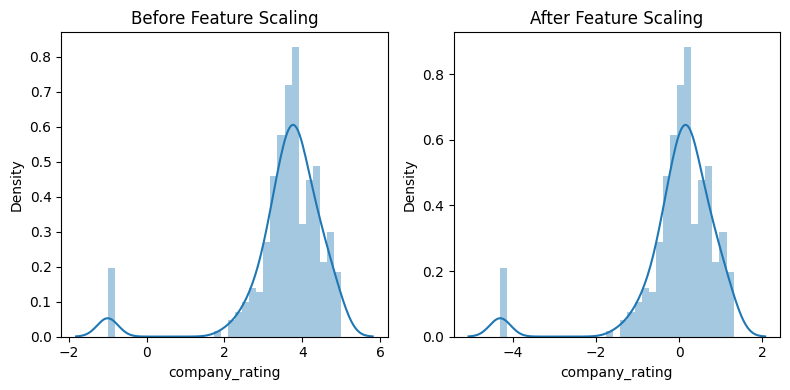

In [222]:
# Plotting company_rating before & after feature scaling
plt.figure(figsize=(8, 4))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=X['company_rating'])
p = plt.title('Before Feature Scaling')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=X_final['company_rating'])
p = plt.title('After Feature Scaling')

plt.tight_layout()
plt.show()

This shows that feature Scaling doesnot change the distribution of the data, it only reduces the scale of that particular feature.

In [223]:
X_final.head(3)

,company_rating,company_founded,job_seniority,python_job,excel_job,sql_job,tableau_job,job_in_headquarter,revenue,competitors,job_title_data analyst,job_title_data scientist,job_title_director,job_title_manager,job_title_ml engineer,type_of_ownership_College / University,type_of_ownership_Government,type_of_ownership_Hospital,type_of_ownership_Nonprofit Organization,type_of_ownership_Private,type_of_ownership_Subsidiary or Business Segment,sector_Aerospace & Defense,sector_Biotech & Pharmaceuticals,sector_Business Services,sector_Finance,sector_Health Care,sector_Information Technology,sector_Insurance,sector_Manufacturing
0,0.186254,0.331414,0,1,1,0,1,0,6,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,-0.188607,0.349790,0,1,0,0,0,0,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1.123409,0.393222,0,1,1,1,0,1,7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [224]:
X_final.shape

(956, 29)

# Build a Model

In [225]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 25)

We will evaluate model using RMSE ( Root Mean Squared Error).

In [227]:
# We do not have built-in method to calculate RMSE. so we will create a function which gives us RMSE value.

def RMSE(true_values, predictions):
    '''
    returns root mean squared error
    '''
    return np.sqrt(mean_squared_error(true_values, predictions))

In [228]:
# Function to show all scores for model.

def show_scores(model):
    '''
    returns MSE, RMSE and R2 Score of Training and Testing for a given model.
    '''
    
    X_preds = model.predict(X_train)
    y_preds = model.predict(X_test)
    
    score = {'MSE Training' : mean_squared_error(y_train, X_preds),
             'MSE Testing' : mean_squared_error(y_test, y_preds),
             'RMSE Training' : RMSE(y_train, X_preds),
             'RMSE Testing' : RMSE(y_test, y_preds),
             'R2 Score Training' : r2_score(y_train, X_preds),
             'R2 Score Testing' : r2_score(y_test, y_preds)}
    
    return score

In [229]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
show_scores(lr)

{'MSE Training': 728.7865802303384,
 'MSE Testing': 671.3835811274198,
 'RMSE Training': 26.996047492741198,
 'RMSE Testing': 25.911070628737434,
 'R2 Score Training': 0.3671479836568883,
 'R2 Score Testing': 0.2941591772503349}

In [230]:
# Lasso

ls = Lasso(random_state=0)
ls.fit(X_train, y_train)
show_scores(ls)

{'MSE Training': 879.4002152505748,
 'MSE Testing': 695.8967787562999,
 'RMSE Training': 29.65468285533627,
 'RMSE Testing': 26.379855548435057,
 'R2 Score Training': 0.23636052790928563,
 'R2 Score Testing': 0.26838789527537377}

In [231]:
# Random Forest Regressor

rfg = RandomForestRegressor(random_state=0)
rfg.fit(X_train, y_train)
show_scores(rfg)

{'MSE Training': 80.35920480422169,
 'MSE Testing': 367.49468880993857,
 'RMSE Training': 8.964329579183358,
 'RMSE Testing': 19.170150985580122,
 'R2 Score Training': 0.9302189609803085,
 'R2 Score Testing': 0.6136444786597934}

We got best results for Random Forest Regressor. So we will do hyperparameter tuning on it and find best parameters.

## Hyperparameter Tuning

In [232]:
rfg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

These are all the parameters for Random Forest Regressor. <br>
By reading documentation, we get to know that n_estimators and max_features are most important parameters for this model.<br>
So we will try different values of parameters and apply Randomized SearchCV.

In [236]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(100, 1200, num= 8)],
    'max_depth': [None, 5, 10, 14, 18],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 15, 100]
            }

# Instantiate the random search model
rfg_gridcv = GridSearchCV(estimator = rfg, param_grid = param_grid, 
                          cv = 5, n_jobs = 1, verbose = 2)

In [237]:
%%time

# fit the model 
rfg_gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=257; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=257; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=257; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=257; total time=   0.5s
[CV] END 

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=15, n_estimators=257; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=15, n_estimators=257; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=15, n_estimators=257; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=100, n_estimators=1200; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=100, n_estimators=1200; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=15, n_estimators=257; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=15, n_estimators=257; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=257; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=1200; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=15, n_estimators=257; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=100, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=100, n_estimators=1200; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=100, n_estimators=1200; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=100, n_estimators=1200; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=10, min_sample

[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=10, min_sampl

[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=100, n_estimators=1042; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=100, n_estimators=1042; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=100, n_estimators=1200; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=100, n_estimators=1200; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=100, n_estimators=1200; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=100, n_estimators=1200; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=100, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_sampl

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total tim

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=100, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=100, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=100, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=100, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total t

[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=257; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=257; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=15, n_estimators=257; total tim

[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=257; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=257; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=257; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=257; total time=   0.

[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=257; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=257; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=257; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=257; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=257; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=15, n_estimators=414; total tim

[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=257; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=257; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=257; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=257; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=257; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=414; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=414; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=414; total tim

[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=257; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=257; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=257; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=257; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=257; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=414; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=414; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=414; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=414; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=15, n_estimators=414;

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=257; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=257; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=257; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=257; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=257; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=414; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=414; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=414; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=414; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=414; total tim

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=257; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=257; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=257; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=257; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=414; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=414; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=414; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=414; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=414; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=571;

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=414; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=414; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=414; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=414; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=414; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=571; total tim

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=257; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=257; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=257; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=414; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=414; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=414; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=414; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=414; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=571; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=571;

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=257; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=257; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=257; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=414; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=414; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=414; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=414; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=414; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=571; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=571; total tim

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=257; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=257; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=414; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=414; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=414; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=414; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=414; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=571; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=571; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=571;

[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=257; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=257; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=414; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=414; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=414; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=414; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=414; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=571; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=571; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=571;

[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=257; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=414; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=414; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=414; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=414; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=414; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=571; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=571; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estimators=571; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=15, n_estim

[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=257; total time=   0.5s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=414; total time=   0.9s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=414; total time=   0.9s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=414; total time=   0.9s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=414; total time=   0.9s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=414; total time=   0.9s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=571; total time=   1.3s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=571; total time=   1.3s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=571; total time=   1.3s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=571; total tim

[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=15, n_estimators=414; total time=   0.7s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=15, n_estimators=414; total time=   0.7s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=15, n_estimators=414; total time=   0.7s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=15, n_estimators=414; total time=   0.7s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=15, n_estimators=414; total time=   0.7s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=15, n_estimators=571; total time=   1.0s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=15, n_estimators=571; total time=   1.0s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=15, n_estimators=571; total time=   1.0s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=15, n_estimators=571; total time=   1.0s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=15, n_estimators=571;

[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=414; total time=   0.8s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=414; total time=   0.8s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=414; total time=   0.8s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=414; total time=   0.8s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=414; total time=   0.8s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=571; total time=   1.1s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=571; total time=   1.1s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=571; total time=   1.1s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=571; total time=   1.1s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=571; total tim

[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=15, n_estimators=414; total time=   0.6s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=15, n_estimators=414; total time=   0.6s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=15, n_estimators=414; total time=   0.7s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=15, n_estimators=414; total time=   0.7s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=15, n_estimators=571; total time=   0.9s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=15, n_estimators=571; total time=   1.0s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=15, n_estimators=571; total time=   1.0s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=15, n_estimators=571; total time=   1.0s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=15, n_estimators=571; total time=   1.0s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=15, n_estimators=728;

[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=2, n_estimators=414; total time=   0.7s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=2, n_estimators=414; total time=   0.6s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=2, n_estimators=414; total time=   0.6s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=2, n_estimators=414; total time=   0.6s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=2, n_estimators=571; total time=   0.9s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=2, n_estimators=571; total time=   0.9s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=2, n_estimators=571; total time=   0.8s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=2, n_estimators=571; total time=   0.9s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=2, n_estimators=571; total time=   0.9s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=2, n_estimators=728; total tim

[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=15, n_estimators=414; total time=   0.6s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=15, n_estimators=414; total time=   0.5s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=15, n_estimators=414; total time=   0.6s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=15, n_estimators=571; total time=   0.9s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=15, n_estimators=571; total time=   0.9s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=15, n_estimators=571; total time=   0.9s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=15, n_estimators=571; total time=   1.0s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=15, n_estimators=571; total time=   1.0s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=15, n_estimators=728; total time=   1.2s
[CV] END max_depth=14, min_samples_leaf=5, min_samples_split=15, n_estimators=728;

[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=2, n_estimators=414; total time=   0.5s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=2, n_estimators=414; total time=   0.6s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=2, n_estimators=414; total time=   0.6s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=2, n_estimators=571; total time=   0.7s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=2, n_estimators=571; total time=   0.8s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=2, n_estimators=571; total time=   0.8s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=2, n_estimators=571; total time=   0.8s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=2, n_estimators=571; total time=   0.8s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=2, n_estimators=728; total time=   1.0s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=2, n_estimators=728;

[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=15, n_estimators=414; total time=   0.5s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=15, n_estimators=414; total time=   0.6s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=15, n_estimators=571; total time=   0.8s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=15, n_estimators=571; total time=   0.8s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=15, n_estimators=571; total time=   0.9s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=15, n_estimators=571; total time=   0.8s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=15, n_estimators=571; total time=   0.8s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=15, n_estimators=728; total time=   1.0s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=15, n_estimators=728; total time=   1.0s
[CV] END max_depth=14, min_samples_leaf=10, min_samples_split=15, n_estim

[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=414; total time=   0.9s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=414; total time=   1.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=571; total time=   1.3s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=571; total time=   1.4s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=571; total time=   1.3s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=571; total time=   1.4s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=571; total time=   1.3s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=728; total time=   1.8s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=728; total time=   1.8s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=728; total tim

[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=15, n_estimators=414; total time=   0.7s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=15, n_estimators=571; total time=   1.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=15, n_estimators=571; total time=   1.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=15, n_estimators=571; total time=   1.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=15, n_estimators=571; total time=   1.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=15, n_estimators=571; total time=   1.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=15, n_estimators=728; total time=   1.3s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=15, n_estimators=728; total time=   1.3s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=15, n_estimators=728; total time=   1.2s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=15, n_estimators=728;

[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=414; total time=   0.8s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=571; total time=   1.1s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=571; total time=   1.1s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=571; total time=   1.1s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=571; total time=   1.2s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=571; total time=   1.1s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=728; total time=   1.4s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=728; total time=   1.5s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=728; total time=   1.5s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=728; total tim

[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=15, n_estimators=571; total time=   0.9s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=15, n_estimators=571; total time=   0.9s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=15, n_estimators=571; total time=   0.9s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=15, n_estimators=571; total time=   0.9s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=15, n_estimators=571; total time=   0.9s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=15, n_estimators=728; total time=   1.2s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=15, n_estimators=728; total time=   1.2s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=15, n_estimators=728; total time=   1.2s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=15, n_estimators=728; total time=   1.2s
[CV] END max_depth=18, min_samples_leaf=2, min_samples_split=15, n_estimators=728;

[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=571; total time=   1.0s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=571; total time=   0.9s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=571; total time=   1.0s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=571; total time=   1.0s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=571; total time=   1.0s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=728; total time=   1.3s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=728; total time=   1.3s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=728; total time=   1.3s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=728; total time=   1.2s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=2, n_estimators=728; total tim

[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=15, n_estimators=571; total time=   0.8s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=15, n_estimators=571; total time=   0.8s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=15, n_estimators=571; total time=   0.9s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=15, n_estimators=571; total time=   0.9s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=15, n_estimators=728; total time=   1.2s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=15, n_estimators=728; total time=   1.2s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=15, n_estimators=728; total time=   1.2s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=15, n_estimators=728; total time=   1.1s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=15, n_estimators=728; total time=   1.2s
[CV] END max_depth=18, min_samples_leaf=5, min_samples_split=15, n_estimators=885;

[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=2, n_estimators=571; total time=   0.8s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=2, n_estimators=571; total time=   0.8s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=2, n_estimators=571; total time=   0.8s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=2, n_estimators=571; total time=   0.8s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=2, n_estimators=728; total time=   1.1s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=2, n_estimators=728; total time=   1.1s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=2, n_estimators=728; total time=   1.1s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=2, n_estimators=728; total time=   1.0s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=2, n_estimators=728; total time=   1.0s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=2, n_estimators=885;

[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=15, n_estimators=571; total time=   0.8s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=15, n_estimators=571; total time=   0.8s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=15, n_estimators=571; total time=   0.9s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=15, n_estimators=571; total time=   1.0s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=15, n_estimators=728; total time=   1.4s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=15, n_estimators=728; total time=   1.2s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=15, n_estimators=728; total time=   1.0s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=15, n_estimators=728; total time=   1.1s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=15, n_estimators=728; total time=   1.0s
[CV] END max_depth=18, min_samples_leaf=10, min_samples_split=15, n_estim

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=1,
             param_grid={'max_depth': [None, 5, 10, 14, 18],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 15, 100],
                         'n_estimators': [100, 257, 414, 571, 728, 885, 1042,
                                          1200]},
             verbose=2)

In [245]:
rfg_gridcv.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [246]:
show_scores(rfg_gridcv)

{'MSE Training': 80.56625047989829,
 'MSE Testing': 362.91641943483063,
 'RMSE Training': 8.97587045806134,
 'RMSE Testing': 19.050365335993707,
 'R2 Score Training': 0.9300391699730625,
 'R2 Score Testing': 0.6184577173408305}

### best model

In [247]:
best_model = RandomForestRegressor(n_estimators=1200,
                                   max_depth=None,
                                   min_samples_leaf=1,
                                   min_samples_split=2,
                                  random_state=0)
best_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1200, random_state=0)

In [248]:
show_scores(best_model)

{'MSE Training': 80.56625047989829,
 'MSE Testing': 362.91641943483063,
 'RMSE Training': 8.97587045806134,
 'RMSE Testing': 19.050365335993707,
 'R2 Score Training': 0.9300391699730625,
 'R2 Score Testing': 0.6184577173408305}

In [249]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

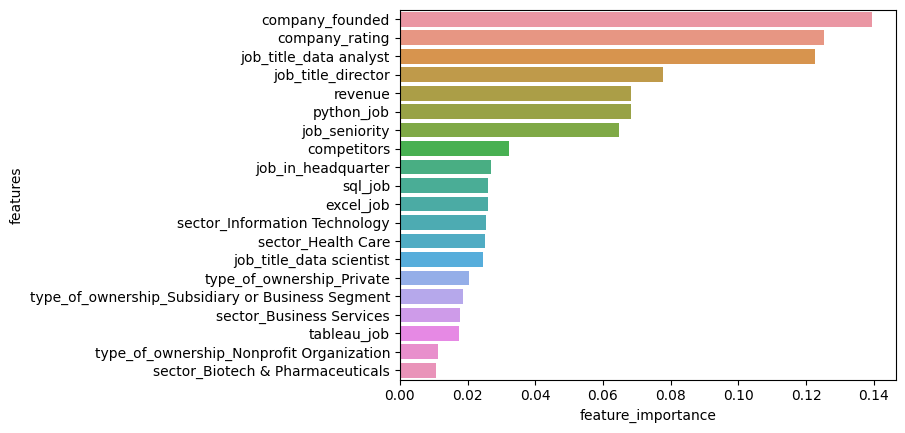

In [250]:
plot_features(X_train.columns, best_model.feature_importances_)

In [251]:
# Save best model

import pickle
pickle.dump(best_model, open('D:\\Marvellous\\ML\\case_studies\\Supervised\\Regression_problems\\Data_Scientist_Salary_Predictions\\saved_model\\best_rfg.pkl','wb'))